## 🧠 Step 1: Import Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller

warnings.filterwarnings('ignore')
sns.set(style='whitegrid')


## 📥 Step 2: Load and Prepare the Data

Columns in CSV: ['Ticker', 'AAPL', 'AAPL.1', 'AAPL.2', 'AAPL.3', 'AAPL.4']


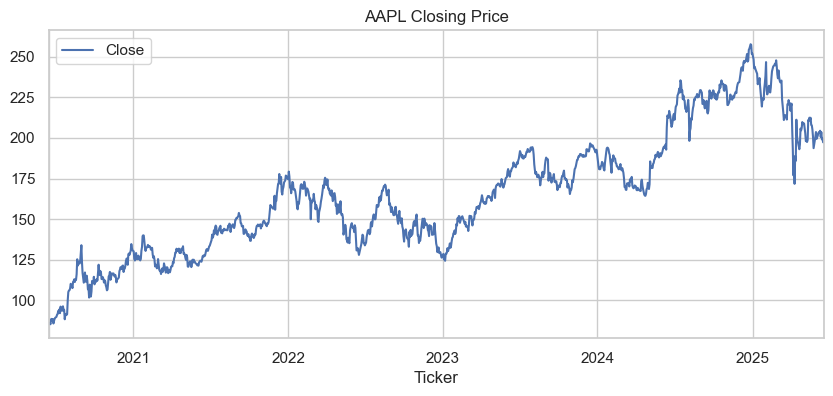

In [2]:
# Read the CSV, skipping the first row and using the second row as header
df = pd.read_csv('../data/AAPL.csv', header=1)
print("Columns in CSV:", df.columns.tolist())

date_col = 'Ticker'  # Use the correct column name for dates

# Remove the header row if present (i.e., where Ticker == 'Date')
df = df[df[date_col] != 'Date'].copy()
df[date_col] = pd.to_datetime(df[date_col])
df.set_index(date_col, inplace=True)
df = df.asfreq('B')  # business day frequency

# Use the correct column for closing price, e.g., 'AAPL.3' (adjust as needed)
df['Close'] = pd.to_numeric(df['AAPL.3'], errors='coerce')
df['Close'].interpolate(method='linear', inplace=True)  # handle missing

df = df[['Close']].copy()  # Keep only Close price
df.plot(title='AAPL Closing Price', figsize=(10, 4))
plt.show()


## 🧪 Step 3: Test for Stationarity (ADF Test)

In [3]:
result = adfuller(df['Close'])
print(f"ADF Statistic: {result[0]:.4f}")
print(f"p-value: {result[1]:.4f}")


ADF Statistic: -2.0771
p-value: 0.2538


## 🔍 Step 4: Auto ARIMA Parameters with AIC Check (Optional)

## ⚙️ Step 5: Fit ARIMA Model

In [4]:
from statsmodels.tsa.arima.model import ARIMA

train = df['Close'][:-30]
test = df['Close'][-30:]

model = ARIMA(train, order=(5,1,2))  # p,d,q values can be tuned
fitted_model = model.fit()

forecast = fitted_model.forecast(steps=30)


## 📊 Step 6: Plot Forecast vs. Actual

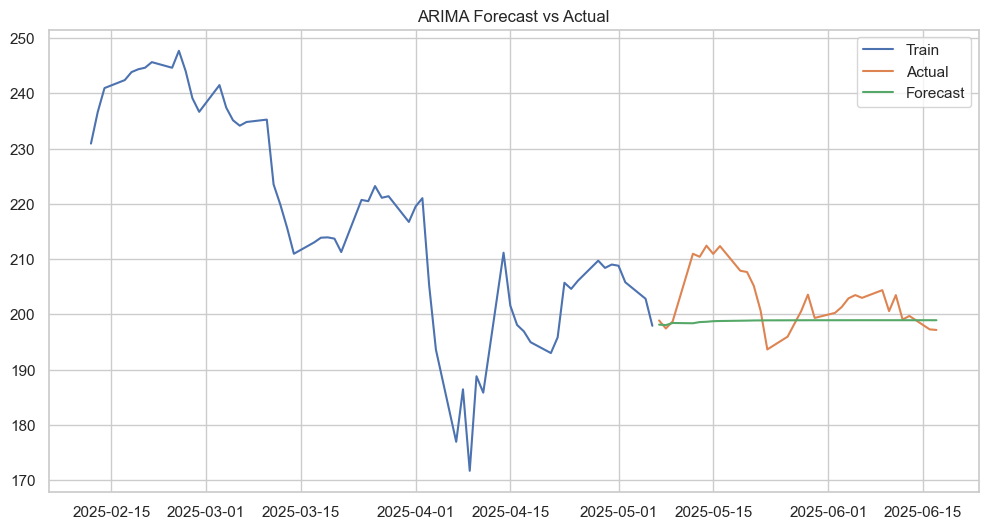

In [5]:
plt.figure(figsize=(12, 6))
plt.plot(train[-60:], label='Train')
plt.plot(test, label='Actual')
plt.plot(forecast, label='Forecast')
plt.title('ARIMA Forecast vs Actual')
plt.legend()
plt.show()



## 📈 Step 7: Evaluate Forecast

In [6]:
import sys
import os
sys.path.append(os.path.abspath(os.path.join('..', 'src')))
from evaluate_models import evaluate_forecast, print_evaluation

results = evaluate_forecast(test.values, forecast.values, model_name='ARIMA')
print_evaluation(results)



📊 Evaluation for ARIMA
------------------------------
MAE : 4.6370
MSE : 40.0369
RMSE: 6.3275
